In [140]:
try: #If running in colab
    import google.colab
    IN_COLAB = True
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [141]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')

print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.5.0  running in colab?:  False


In [142]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [143]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)
(10000, 10)


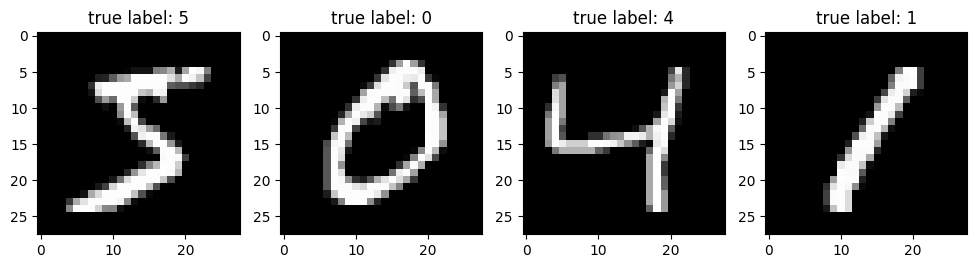

In [144]:
# visualize the 4 first mnist images before shuffling the pixels
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')


In [145]:
# prepare data for fcNN - we need a vector as input

X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

# check the shape
print(X_train_flat.shape)
print(Y_train.shape)
print(X_val_flat.shape)
print(Y_val.shape)


(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


In [146]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# sigmoid -> 391/391 - 2s - loss: 0.0812 - accuracy: 0.9766 - val_loss: 0.0978 - val_accuracy: 0.9708
# relu -> 391/391 - 2s - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0946 - val_accuracy: 0.9759
# 100,100,50,25 relu -> 391/391 - 3s - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0948 - val_accuracy: 0.975
# -> overfitting
#

In [147]:
# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [148]:
# train the model
history=model.fit(X_train_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 5s - loss: 0.4043 - accuracy: 0.8830 - val_loss: 0.1810 - val_accuracy: 0.9496
Epoch 2/10
391/391 - 2s - loss: 0.1627 - accuracy: 0.9534 - val_loss: 0.1329 - val_accuracy: 0.9612
Epoch 3/10
391/391 - 2s - loss: 0.1177 - accuracy: 0.9657 - val_loss: 0.1203 - val_accuracy: 0.9649
Epoch 4/10
391/391 - 2s - loss: 0.0916 - accuracy: 0.9726 - val_loss: 0.1158 - val_accuracy: 0.9661
Epoch 5/10
391/391 - 2s - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0958 - val_accuracy: 0.9708
Epoch 6/10
391/391 - 2s - loss: 0.0599 - accuracy: 0.9818 - val_loss: 0.0960 - val_accuracy: 0.9725
Epoch 7/10
391/391 - 2s - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0875 - val_accuracy: 0.9751
Epoch 8/10
391/391 - 2s - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.0954 - val_accuracy: 0.9729
Epoch 9/10
391/391 - 3s - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0867 - val_accuracy: 0.9761
Epoch 10/10
391/391 - 3s - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0866 - val_accuracy: 0.9766

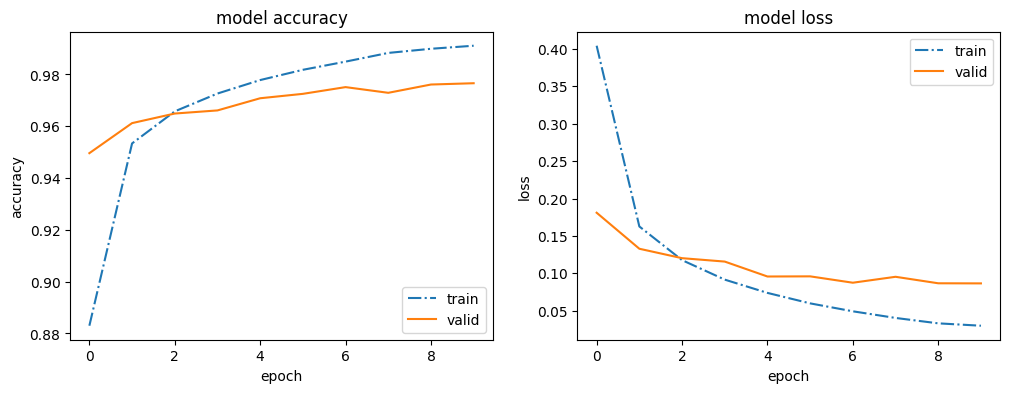

In [149]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')


In [150]:
pred=model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)


[[ 967    1    2    2    1    0    3    0    3    1]
 [   0 1118    3    4    0    1    3    1    5    0]
 [   2    1 1009    4    4    0    1    6    5    0]
 [   0    0    7  989    0    4    0    4    2    4]
 [   0    0    2    1  943    0    6    3    3   24]
 [   2    0    0   10    1  871    2    0    2    4]
 [   3    3    3    1    5   14  927    0    2    0]
 [   0    1    6    7    0    1    0 1003    1    9]
 [   4    0    3   13    2    3    1    5  939    4]
 [   2    2    0    5    4    3    0    3    1  989]]
Acc_fc_orig_flat =  0.9755


In [151]:
batch_size = 128
nb_classes = 10
img_rows, img_cols = 28,28
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [152]:
#--------------------------------------------------------------------------------------------------
# define CNN with 2 hidden layers
model = Sequential()

model.add(Convolution2D(32, kernel_size, padding = 'same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))
model.add(Convolution2D(64, kernel_size, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [153]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
activation_44 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)            

In [154]:
# train the model
history=model.fit(X_train, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=1,
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/10
391/391 [==============================] - 121s 306ms/step - loss: 0.2926 - accuracy: 0.9153 - val_loss: 0.0871 - val_accuracy: 0.9762

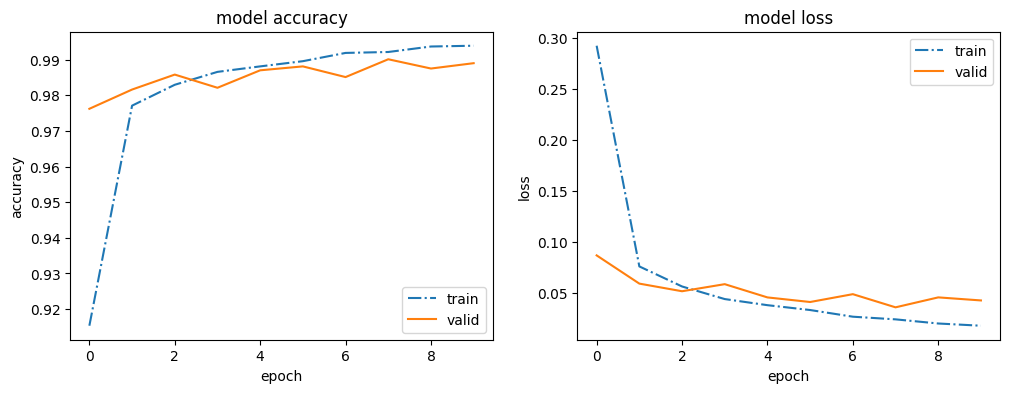

In [155]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [156]:
pred=model.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_orig_flat = " , acc_fc_orig)

[[ 978    0    0    1    0    0    0    0    1    0]
 [   0 1129    2    0    0    0    1    1    2    0]
 [   6    1 1020    0    1    0    0    4    0    0]
 [   1    0    1 1000    0    5    0    2    1    0]
 [   2    0    0    0  966    0    1    3    2    8]
 [   4    0    0    5    0  878    1    2    1    1]
 [   8    2    1    0    1    4  936    0    6    0]
 [   0    1    5    0    0    0    0 1019    1    2]
 [   5    0    2    0    0    1    0    1  963    2]
 [   2    1    2    0    3    5    0    3    2  991]]
Acc_fc_orig_flat =  0.988
